In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


([], <a list of 0 Text yticklabel objects>)

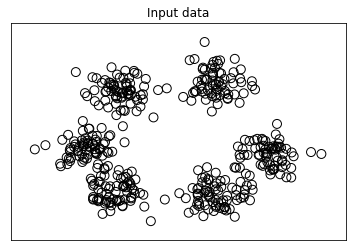

In [2]:
#load input data
X = np.loadtxt('data_quality.txt',delimiter=',') #data_clustering
#Define k clusters
num_clusters=6
#plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=80)
x_min, x_max = X[:,0].min() - 1, X[:,0].max()+1
y_min, y_max = X[:,1].min() -1, X[:,1].max()+1
plt.title("Input data")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())

shape (1136, 1388)
shape (1576768,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


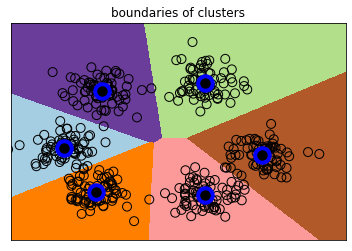

In [4]:
#Create KMean object     ||\\\|| KMEANS++ ajsuta automaticamente a los grupos de manera mas inteligente, para cubrir todo mas rapido
kmeans= KMeans(init='k-means++',n_clusters=num_clusters, n_init=10)
#Create the kmean clustering model
kmeans.fit(X)
#To visualize boundaries, we need to create a grid of points and evalueate the model 
#Step size of the mesh
step_size= 0.01
#Define the grid of points to plot the boundaries
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min,y_max= X[:,1].min()-1, X[:,1].max()+1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

#predict output lables for all the points on the grid
output= kmeans.predict(np.c_[x_vals.ravel(),y_vals.ravel()])
print("shape",x_vals.shape)
print("shape",output.shape)
print(type(x_vals))
print(type(output))
#plot different regions and color them
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest', extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
cmap=plt.cm.Paired, aspect='auto',origin='lower')

#Overlay input points
plt.scatter(X[:,0],X[:,1], marker='o', facecolors='none', edgecolors='black',s=80)

#Plot the center of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
           marker='o',facecolors='black', s=210, linewidths=4, color='blue', zorder=12)

x_min, x_max = X[:,0].min()-1, X[:,0].max() + 1
x_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
plt.title("boundaries of clusters")
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
plt.show()